1. Twitter archive file

In [278]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import time

In [279]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1405,699323444782047232,NaN,NaN,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699323444...,10,10,None,None,None,None,None
1555,688894073864884227,NaN,NaN,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hamrick. He's covered in corn flakes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688894073...,7,10,Hamrick,None,None,pupper,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,None,None,None,None
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None


In [280]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Tweet Image Predictions

In [281]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code
r.headers['content-type']
r.encoding
r.text
images=pd.read_csv('image-predictions.tsv',sep = '\t')
images.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [282]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Twitter API

In [283]:
#The following codes are run in order to hide consumer_key, consumer_secret, access_token and access_secret according to the standard prictice for APIs

consumer_key = 'Ls5oVv96rIJo3wAzhmKSMo1vP'
consumer_secret = 'GIY6efXQgeMIncbl4G4Xm5LHUZ4caCYAlEWm4HfsLKtTpwaF7r'
access_token = '1083184882363322368-3oWbDRDN96wRBeEhb0zBtfzBAvXImb'
access_secret = '7qTDXEXwxpms9GNJ5UwV9QxIfXyAc4HiFaTdNLOD9AhsG'
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)



In [284]:
hide_toggle(for_next=True)

In [285]:
consumer_key = 'Ls5oVv96rIJo3wAzhmKSMo1vP'
consumer_secret = 'GIY6efXQgeMIncbl4G4Xm5LHUZ4caCYAlEWm4HfsLKtTpwaF7r'
access_token = '1083184882363322368-3oWbDRDN96wRBeEhb0zBtfzBAvXImb'
access_secret = '7qTDXEXwxpms9GNJ5UwV9QxIfXyAc4HiFaTdNLOD9AhsG'

In [274]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [10]:
with open('tweet_json.txt', 'w') as outfile:
    for line in twitter_archive.tweet_id:
        print(twitter_archive.loc[twitter_archive.tweet_id==line].index[0])
        try:
            tweet = api.get_status(line, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print(line)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
888202515573088257
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
873697596434513921
96
97
98
99
100
101
872668790621863937
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
869988702071779329
119
120
121
122
123
124
125
126
127
128
129
130
131
132
866816280283807744
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
861769973181624320
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
8454

1794
1795
1796
1797
1798
1799
1800
Rate limit reached. Sleeping for: 731
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
19

In [11]:
data_list = []
data_dict = {
                'tweet_id': '',
                'favorite_count': '',
                'retweet_count': ''
            }
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_dict['tweet_id'] = data['id']
        data_dict['favorite_count'] = data['favorite_count']
        data_dict['retweet_count'] = data['retweet_count']
        data_list.append(data_dict.copy())
json_tweet = pd.DataFrame(data_list)

In [12]:
json_tweet

,favorite_count,retweet_count,tweet_id
0,37940,8288,892420643555336193
1,32579,6119,892177421306343426
2,24532,4054,891815181378084864
3,41287,8425,891689557279858688
4,39477,9129,891327558926688256
5,19834,3038,891087950875897856
6,11598,2010,890971913173991426
7,64014,18384,890729181411237888
8,27241,4175,890609185150312448
9,31265,7190,890240255349198849


Assessing Data

Visual Assessment

In [264]:
twitter_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10,10,Nico,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1215,715009755312439296,NaN,NaN,2016-03-30 02:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Siba. She's remarkably mobile. Very sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715009755...,12,10,Siba,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
1723,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,None,None,pupper,None


In [14]:
twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/739979191639244800/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/832369877331693569/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/841077006473256960/photo/1                                                                                                                                                                                                                                        2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,

In [15]:
sum(twitter_archive.expanded_urls.isnull())

59

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Few observations:
1. tweet_id, in_reply_to_status_id and in_reply_to_user_id have numerical types. However, no mathematical operations are expected to be performed on them.
2. timestamp is stored as a string
3. retweeted_status_id, retweeted_status_id and retweeted_status_timestamp also have the wrong datatype. However, as retweeted data isn't required in the final dataset, these columns aren't necessary.
4. The 4 dog stages doggo, floofer, pupper and puppo contain 2356 non-null objects each, meaning the cells which should be empty contain strings such as 'none' instead of NaN.


Programattic Asessment

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We see denominator values that are not 10, and some odd numerator values such as 1776.

In [18]:
twitter_archive[twitter_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


The ampersand symbol has 'amp;' following it.

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The html seems unecessary in the column 'source'.

In [20]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [21]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are 23 denominators that are not 10

In [22]:
print(twitter_archive.loc[twitter_archive.rating_denominator==0,'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [23]:
print(twitter_archive['text'][313]) #wrong denominator is used here. Should take the 10 from 13/10.

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [24]:
print(twitter_archive.loc[twitter_archive.rating_denominator==170,'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [25]:
print(twitter_archive['text'][1120]) #There are 17 dogs here.

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [26]:
print(twitter_archive.loc[twitter_archive.rating_denominator==11,'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object


In [27]:
print(twitter_archive['text'][784]) #correct denominator should be 10 but the data mistakenly used 11 from the date 9/11
print(twitter_archive['text'][1068]) #correct denominator should be 10 but the data mistakenly used 11 from the date 9/11
print(twitter_archive['text'][1662]) #correct denominator should be 10 but the data mistakenly used 11 from 7/11 (not sure what 7/11 is)

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [28]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
print(twitter_archive.loc[twitter_archive.rating_numerator==420, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==1776, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==0, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==666, 'text'])

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object


In [30]:
print(twitter_archive['text'][188])
print(twitter_archive['text'][2074])
print(twitter_archive['text'][979])
print(twitter_archive['text'][1016])
print(twitter_archive['text'][189])

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


In [31]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Buddy          7
Daisy          7
Bailey         7
Bella          6
Koda           6
Stanley        6
Rusty          6
Dave           6
Oscar          6
Jack           6
Jax            6
Milo           6
Scout          6
Leo            6
Chester        5
            ... 
Shikha         1
Malikai        1
Travis         1
Ziva           1
Barclay        1
Ginger         1
Steve          1
Stu            1
Torque         1
Darby          1
Dylan          1
Horace         1
Darla          1
Lilah          1
Biden          1
Wishes         1
Divine         1
Amélie         1
Chaz           1
Ralpher        1
Bobble         1
Kobe           1
Jeffrie        1
Damon          1
Jiminus        1
Cheesy         1
Alejandro      1
Naphaniel     

In [32]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
actually         2
getting          2
mad              2
not              2
incredibly       1
unacceptable     1
life             1
this             1
space            1
my               1
light            1
such             1
his              1
officially       1
old              1
all              1
by               1
infuriating      1
Name: name, dtype: int64

In [33]:
twitter_archive_subset=twitter_archive[['text','name']]
twitter_archive_subset[twitter_archive_subset.name.str.islower()]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,Here is a pupper approaching maximum borkdrive...,a
118,RT @dog_rates: We only rate dogs. This is quit...,quite
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite
335,There's going to be a dog terminal at JFK Airp...,not
369,"Occasionally, we're sent fantastic stories. Th...",one
542,We only rate dogs. Please stop sending in non-...,incredibly
649,Here is a perfect example of someone who has t...,a
682,RT @dog_rates: Say hello to mad pupper. You kn...,mad


It looks like the name of the dog is the first word after 'is' in the text.

In [266]:
twitter_archive.loc[(twitter_archive[['doggo','floofer','pupper','puppo']]!='None').sum(axis=1)>1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


There are 14 tweets with more than one dog stage.

In [34]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
sum(images.tweet_id.duplicated())

0

In [36]:
sum(images.jpg_url.duplicated())

66

In [37]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                       

In [38]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False
702,684902183876321280,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,Pembroke,0.708034,True,Cardigan,0.291447,True,dingo,0.000185,False
1074,717009362452090881,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1,Siberian_husky,0.506154,True,Eskimo_dog,0.269656,True,malamute,0.060658,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
1909,852912242202992640,https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,1,Great_Dane,0.783765,True,Rhodesian_ridgeback,0.114147,True,English_foxhound,0.046440,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True


In [39]:
sum(json_tweet['tweet_id'].duplicated())

0

Quality (content issues)

1. Some columns of data (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id,timestamps and source) have wrong data type;
2. There are columns with no images;
3. There are information related to retwwets that is not required for this analysis;
4. The column 'source' contains extraneous html code;
5. The null cells in the columns 'in_reply_to_status_id' and 'in_reply_to_user_id' have data type of string;
6. The amphersands in text show up as '&amp' instead of 'amp';
7. The name column has invalid names such as 'None','a','an' and 'the' as the name is determined by the first word that appears after 'this is';
8. There are denominators other than 10;
9. jpg_url has duplicated values.

Tidiness (structural issues)

1. In twitter_archive dataset, the stages of dogs are in columns instead of rows;
2. There could be an additional column for gender;
3. There could be an additional column for dog type;
4. All the tables should be part of one dataset;
5. There could be a column for rating.

Cleaning Data

In [202]:
twitter_archive_clean=twitter_archive.copy()
images_clean=images.copy()
json_tweet_clean=json_tweet.copy()

Quality issue #1: Some columns of data (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id,timestamps and source) have wrong data type.

Solution: Convert tweet_id, in_reply_to_status_id, in_reply_to_user_id to strings, timestamp to datetime and source to category

In [203]:
#Code
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id=twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id=twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.source=twitter_archive_clean.source.astype('category')

In [204]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1)

Quality Issue #2:There are columns with no images.

Solution: Drop the 59 reconrds without images

In [205]:
#Code
twitter_archive_clean=twitter_archive_clean.dropna(subset=['expanded_urls'])

In [206]:
#Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         2297 non-null object
in_reply_to_user_id           2297 non-null object
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null category
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: category(1)

Quality issue #3: There are 180 retweet values that are not needed for the analysis

Solution: Delete the retweets

In [207]:
#Code
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [208]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         2117 non-null object
in_reply_to_user_id           2117 non-null object
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null category
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: category(1), date

Quality issue #4: The column 'source' contains extraneous html code

Solution: Remove html from the column

In [209]:
#Code
twitter_archive_clean.source=twitter_archive_clean.source.str.extract(r'>([A-Za-z\s]+)', expand=False)

In [210]:
#Test
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1985
Vine                    91
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

Quality issue #5: null cells in the columns 'in_reply_to_status_id' and 'in_reply_to_user_id' have data type of string

Solution: Change nan to 'NaN'

In [211]:
twitter_archive_clean.in_reply_to_status_id.value_counts()

nan                  2094
6.67152164079e+17       2
6.92041934689e+17       1
6.67806454574e+17       1
6.91416866452e+17       1
6.84222868336e+17       1
6.74752233201e+17       1
7.46885919388e+17       1
6.71561002136e+17       1
6.74793399141e+17       1
6.75707330207e+17       1
6.706683835e+17         1
6.75497103322e+17       1
7.59099523533e+17       1
7.33109485276e+17       1
6.84481074559e+17       1
7.29113531271e+17       1
7.03255935813e+17       1
7.0304194965e+17        1
6.71729906628e+17       1
6.7534938434e+17        1
6.74999807682e+17       1
8.55818117272e+17       1
Name: in_reply_to_status_id, dtype: int64

In [212]:
twitter_archive_clean.in_reply_to_user_id.value_counts()

nan             2094
4196983835.0      23
Name: in_reply_to_user_id, dtype: int64

In [213]:
#Code
twitter_archive_clean.loc[twitter_archive_clean.in_reply_to_status_id=='nan','in_reply_to_status_id']=np.NaN
twitter_archive_clean.loc[twitter_archive_clean.in_reply_to_user_id=='nan','in_reply_to_user_id']=np.NaN

In [214]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), floa

Quality Issue #6:The amphersands in text show up as '&amp' instead of 'amp'

Solution: Replace '&amp;' with '&'

In [215]:
#Code
twitter_archive_clean.text=twitter_archive_clean.text.str.replace('&amp;','&')

In [216]:
#Test
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Quality issue #7:The name column has invalid names such as 'None','a','an' and 'the' as the name is determined by the first word that appears after 'this is'

Solution: Replace with null if the name is None or lowercase.

In [138]:
#Code
twitter_archive_clean['name'].value_counts()

None         622
a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
the            8
Lola           8
Winston        8
Daisy          7
Toby           7
Koda           6
Bailey         6
Bo             6
Bella          6
an             6
Stanley        6
Oscar          6
Jax            6
Dave           5
Chester        5
Buddy          5
Bentley        5
Scout          5
Louis          5
Leo            5
Milo           5
            ... 
Ralf           1
Beebop         1
Arlen          1
Akumi          1
Ralpher        1
Amélie         1
Skittles       1
Divine         1
Carbon         1
Shelby         1
Bookstore      1
Monster        1
Iggy           1
Anna           1
Tove           1
Bronte         1
Laela          1
Lupe           1
Edmund         1
Ronduh         1
DayZ           1
Rizzy          1
Lili           1
Dylan          1
Horace         1
Darla          1
Lilah          1
Biden         

In [219]:
#Convert the data type of 'name' from object to string
twitter_archive_clean[['name']] = twitter_archive_clean[['name']].astype(str)

In [220]:
twitter_archive_clean.loc[twitter_archive_clean.name=='None','name']=np.NaN
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(),'name']=np.NaN

In [216]:
#Test
twitter_archive_clean['name'].value_counts()

Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Bella          6
Bailey         6
Oscar          6
Stanley        6
Koda           6
Jax            6
Bo             6
Milo           5
Chester        5
Buddy          5
Rusty          5
Louis          5
Dave           5
Scout          5
Bentley        5
Leo            5
Maggie         4
Phil           4
Dexter         4
              ..
Grizz          1
River          1
Rodney         1
Aldrick        1
Sandra         1
Ziva           1
Fizz           1
Deacon         1
Dot            1
Asher          1
Jersey         1
Arlo           1
Yoda           1
Levi           1
Lucky          1
Maxwell        1
Brockly        1
Jiminus        1
Dook           1
Major          1
Superpup       1
Pancake        1
Balto          1
Kingsley       1
Jarvis         1
Kody           1
Brat           1
Harlso        

In [221]:
#Test
sum(twitter_archive_clean['name'].isnull())

726

Quality issue #8: 18 denominators have different values other than 10.

Solution: Manually correct or drop them individually.

In [61]:
#Code
twitter_archive_clean[twitter_archive_clean.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 & secretly aspires t...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,NaN,None,None,None,None


In [62]:
print(twitter_archive_clean['text'][433])

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


There are multiple dogs here so the denominator of 70 makes sense.

In [63]:
print(twitter_archive_clean['text'][516])

Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


24/7 here means the all the time here so there is no rating. This observation can be dropped.

In [64]:
print(twitter_archive_clean['text'][902])

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


There are multiple dogs here so the rating makes sense.

In [440]:
print(twitter_archive_clean['text'][1068])

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


The dataset took the wrong fraction. The correct rating should be 14/10.

In [460]:
#Code
twitter_archive_clean.iat[1068,10]=14
twitter_archive_clean.iat[1068,11]=10

In [461]:
#Test
twitter_archive_clean.loc[1068]

tweet_id                                                     740373189193256964
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-06-08 02:41:38 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          After so many requests, this is Bretagne. She ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

In [226]:
print(twitter_archive_clean['text'][1120])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


A group of dogs makes this rating correct.

In [341]:
print(twitter_archive_clean['text'][1165])

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


The dataset took the first fraction and 13/10 should be the correct rating.

In [390]:
#Code
twitter_archive_clean.iat[1165,10]=13
twitter_archive_clean.iat[1165,11]=10

In [393]:
#Test
twitter_archive_clean.loc[1165]

tweet_id                                                     700890391244103680
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-02-20 03:51:05
source                                                       Twitter for iPhone
text                          This is Chet. He's dapper af. His owners want ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/700890391...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [230]:
print(twitter_archive_clean['text'][1202])

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


The dataset took the wrong fraction and 11/10 should be used.

In [74]:
#Code
twitter_archive_clean.iat[1202,10]=11
twitter_archive_clean.iat[1202,11]=10

In [75]:
#Test
twitter_archive_clean.loc[1202]

tweet_id                                                     716439118184652801
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-04-03 01:36:11
source                                                       Twitter for iPhone
text                          This is Bluebert. He just saw that both #Final...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

In [231]:
print(twitter_archive_clean['text'][1228])

Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


There is a group of 9 puppers here so the rating makes sense.

In [232]:
print(twitter_archive_clean['text'][1254])

Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12


The rating makes sense given there are 8 dogs.

In [233]:
print(twitter_archive_clean['text'][1274])

From left to right:
Cletus, Jerome, Alejandro, Burp, & Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK


The rating makes sense given there are 5 dogs.

In [234]:
print(twitter_archive_clean['text'][1351])

Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa


The rating makes sense given there is a group of 5 dogs.

In [235]:
print(twitter_archive_clean['text'][1433])

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ


The rating makes sense given there is a group of 4 dogs.

The correct rating seems missing here so we need to drop this observation.

In [237]:
print(twitter_archive_clean['text'][1634])

Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3


There are 13 dogs here so the rating is correct.

In [238]:
print(twitter_archive_clean['text'][1635])

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


This one is the duplicate image from the one above. Since the previous observation captures the correct number of dogs, this row can be dropped.

In [239]:
print(twitter_archive_clean['text'][1662])

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


The dataset captured the wrong fraction and the correct rating should be 10/10.

In [86]:
#Code
twitter_archive_clean.iat[1662,10]=10
twitter_archive_clean.iat[1662,11]=10

In [87]:
#Test
twitter_archive_clean.loc[1662]

tweet_id                                                     682962037429899265
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-01-01 16:30:13
source                                                       Twitter for iPhone
text                          This is Darrel. He just robbed a 7/11 and is i...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/682962037...
rating_numerator                                                             10
rating_denominator                                                           10
name                                    

In [241]:
print(twitter_archive_clean['text'][1779])

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


This rating makes sense given the group of dogs.

In [242]:
print(twitter_archive_clean['text'][1843])

Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw


This rating makes sense given the group of dogs.

In [457]:
print(twitter_archive_clean['text'][2335])

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


Wrong fraction was picked up here and the correct rating should be 9/10.

In [458]:
#Code
twitter_archive_clean.iat[2335,10]=9
twitter_archive_clean.iat[2335,11]=10

In [459]:
#Test
twitter_archive_clean.loc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              9
rating_denominator                                                           10
name                                    

In [400]:
twitter_archive_clean=twitter_archive_clean.drop(516)
twitter_archive_clean=twitter_archive_clean.drop(1635)
twitter_archive_clean=twitter_archive_clean.reset_index(drop=True)

In [248]:
twitter_archive_clean.rating_numerator.value_counts()

12      488
10      435
11      417
13      296
9       154
8        98
7        52
14       41
5        34
6        32
3        19
4        16
2         9
1         5
0         2
60        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
144       1
Name: rating_numerator, dtype: int64

We know that for a single dog, the numerator rating between 8 to 15 is reasonable. The ratings such as 60, 80, 88 are most likely for a group of dogs. Here, we will do some spot checks on the odd ratings such as 0, 1, 2, 666,420 and 1776 to see if the ratings were given as error or not.

In [98]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,None,None,None,None
1014,746906459439529985,7.46885919388e+17,4196983835.0,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,NaN,None,None,None,None


In [99]:
print(twitter_archive_clean['text'][315])

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


In [100]:
print(twitter_archive_clean['text'][1014])

PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [101]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798576900688019456,NaN,NaN,2016-11-15 17:22:24,Twitter for iPhone,RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,None,None,None,None
1444,696490539101908992,6.96488710901e+17,4196983835.0,2016-02-08 00:27:39,Twitter for iPhone,After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,NaN,None,None,None,None
1864,675153376133427200,NaN,NaN,2015-12-11 03:21:23,Twitter for iPhone,What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,NaN,None,None,None,None
1935,673716320723169284,6.73715861854e+17,4196983835.0,2015-12-07 04:11:02,Twitter for iPhone,The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,NaN,None,None,None,None
2033,671550332464455680,6.71544874165e+17,4196983835.0,2015-12-01 04:44:10,Twitter for iPhone,After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,NaN,None,None,None,None
2086,670783437142401025,NaN,NaN,2015-11-29 01:56:48,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,NaN,None,None,None,None
2256,667549055577362432,NaN,NaN,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,NaN,None,None,None,None
2333,666104133288665088,NaN,NaN,2015-11-16 04:02:55,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,None,None,None,None


In [102]:
print(twitter_archive_clean['text'][603])

RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…


In [103]:
print(twitter_archive_clean['text'][1444])

After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me


In [104]:
print(twitter_archive_clean['text'][1864])

What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0


In [105]:
print(twitter_archive_clean['text'][1935])

The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you


In [106]:
print(twitter_archive_clean['text'][2033])

After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes


In [107]:
print(twitter_archive_clean['text'][2086])

Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO


In [108]:
print(twitter_archive_clean['text'][2256])

Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx


In [109]:
print(twitter_archive_clean['text'][2333])

Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX


In [110]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1756,678675843183484930,NaN,NaN,2015-12-20 20:38:24,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,NaN,None,None,None,None
1759,678424312106393600,NaN,NaN,2015-12-20 03:58:55,Twitter for iPhone,This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
1915,674265582246694913,NaN,NaN,2015-12-08 16:33:36,Twitter for iPhone,This is Henry. He's a shit dog. Short pointy e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,None,None,None
2074,670826280409919488,NaN,NaN,2015-11-29 04:47:03,Twitter for iPhone,Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,NaN,None,None,None,None
2232,668142349051129856,NaN,NaN,2015-11-21 19:02:04,Twitter for iPhone,This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,NaN,None,None,None,None
2241,667878741721415682,NaN,NaN,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
2305,666786068205871104,NaN,NaN,2015-11-18 01:12:41,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,NaN,None,None,None,None
2321,666411507551481857,NaN,NaN,2015-11-17 00:24:19,Twitter for iPhone,This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,NaN,None,None,None,None
2344,666051853826850816,NaN,NaN,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,None,None,None,None


In [111]:
print(twitter_archive_clean['text'][1759])

This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz


In [112]:
print(twitter_archive_clean['text'][2232])

This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2


In [113]:
print(twitter_archive_clean['text'][2305])

Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S


In [114]:
print(twitter_archive_clean['text'][2344])

This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc


From the spot checks, it is clear that the low ratings were provided humorously to pictures of non-dogs or dogs with funny postures and therefore no observation needs to be dropped here.

In [115]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.55861584463e+17,194351775.0,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,None,None,None,None
2069,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,None,None,None,None


In [116]:
print(twitter_archive_clean['text'][188])

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research


In [117]:
print(twitter_archive_clean['text'][2069])

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [118]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==666]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.55858535607e+17,13615722.0,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,None,None,None,None


In [119]:
print(twitter_archive_clean['text'][189])

@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


In [120]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
977,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [121]:
print(twitter_archive_clean['text'][977])

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


It seems the extrely high ratings were also given humorously and therefore no observation needs to be dropped.

Quality issue #9: jpg_url has duplicated values

Solution:Drop duplicated jpg_url

In [222]:
#Code
images_clean=images_clean.drop_duplicates(subset=['jpg_url'],keep='last')

In [223]:
#Test
sum(images_clean['jpg_url'].duplicated())

0

Remove all the data that is irrelevant to the analysis

In [224]:
#Delete the retweets
twitter_archive_clean=twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

In [225]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 198.5+ KB


Tidiness issue #1: In twitter_archive dataset, the stages of dogs are in columns instead of rows.
Solution: Merge 'doggo', 'floofer', 'pupper', 'puppo' columns into one column 'dog_stages'

In [226]:
twitter_archive_clean['puppo'].value_counts()

None     2093
puppo      24
Name: puppo, dtype: int64

In [227]:
twitter_archive_clean['doggo'].value_counts()

None     2033
doggo      84
Name: doggo, dtype: int64

In [228]:
twitter_archive_clean['floofer'].value_counts()

None       2107
floofer      10
Name: floofer, dtype: int64

In [229]:
twitter_archive_clean['pupper'].value_counts()

None      1885
pupper     232
Name: pupper, dtype: int64

In [230]:
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1200,716730379797970944,2016-04-03 20:53:33,Twitter for iPhone,There has clearly been a mistake. Pup did noth...,12,10,NaN,None,None,None,None


There are 14 observations with more than one dog stages.

In [231]:
twitter_archive_clean.loc[(twitter_archive_clean[['doggo','floofer','pupper','puppo']]!='None').sum(axis=1)>1]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",11,10,NaN,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another d...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,NaN,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie & Lila. Maggie is the doggo, Lila ...",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,NaN,doggo,None,pupper,None


In [232]:
#Code
twitter_archive_clean=pd.melt(twitter_archive_clean,id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],value_vars=['doggo', 'floofer', 'pupper', 'puppo'],var_name='dogs',value_name='dogs_stage')
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

In [234]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
3129,714214115368108032,2016-03-27 22:14:49,Happy Easter from the squad! 🐇🐶 13/10 for all ...,13,10,NaN,None
5219,717009362452090881,2016-04-04 15:22:08,This is Smokey. He's having some sort of exist...,10,10,Smokey,pupper
3670,677700003327029250,2015-12-18 04:00:46,This is Ralph. He's an interpretive dancer. 10...,10,10,Ralph,None


In [235]:
twitter_archive_clean.iat[191,6]='multiple'
twitter_archive_clean.iat[200,6]='multiple'
twitter_archive_clean.iat[460,6]='multiple'
twitter_archive_clean.iat[531,6]='multiple'
twitter_archive_clean.iat[565,6]='multiple'
twitter_archive_clean.iat[575,6]='multiple'
twitter_archive_clean.iat[705,6]='multiple'
twitter_archive_clean.iat[733,6]='multiple'
twitter_archive_clean.iat[778,6]='multiple'
twitter_archive_clean.iat[822,6]='multiple'
twitter_archive_clean.iat[889,6]='multiple'
twitter_archive_clean.iat[956,6]='multiple'
twitter_archive_clean.iat[1063,6]='multiple'
twitter_archive_clean.iat[1113,6]='multiple'

In [236]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 2041 to 6878
Data columns (total 7 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
dogs_stage            2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 132.3+ KB


In [237]:
#Test
twitter_archive_clean.dogs_stage.value_counts()

None        1765
pupper       232
doggo         72
puppo         24
multiple      14
floofer       10
Name: dogs_stage, dtype: int64

In [238]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 2041 to 6878
Data columns (total 7 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
dogs_stage            2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 132.3+ KB


Tidiness Issue #2: Add a column for Gender in twitter_archive_clean dataset

In [239]:
# Loop all the texts to see if there is any pronoun for male or female
# Append the result to a list
male=['he', 'He', 'him', 'his',"he's", 'himself']
female= ['she', 'She', 'her', 'hers', "she's", 'herself']
dog_gender=[ ]
for text in twitter_archive_clean['text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append('NaN')
        

In [240]:
#Test
len(dog_gender)
#Save the result in a new column dog_gender
twitter_archive_clean['dog_gender']=dog_gender

In [241]:
#Save the result in a new column dog_gender
twitter_archive_clean['dog_gender']=dog_gender

In [242]:
#Test
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1225
male       659
female     233
Name: dog_gender, dtype: int64


In [243]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 2041 to 6878
Data columns (total 8 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
dogs_stage            2117 non-null object
dog_gender            2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 148.9+ KB


Tidiness issue #3:
In the images_clean dataset, add one column for dog_type and one column for confidence interval

In [244]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_type'] = dog_type
images_clean['confidence_list'] = confidence_list

In [245]:
#Drop the rows where the dog_type shows 'Error'
images_clean=images_clean[images_clean['dog_type']!='Error']

In [246]:
#Test
images_clean.dog_type.value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Staffordshire_bullterrier          21
Siberian_husky                     20
Shih-Tzu                           20
beagle                             20
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             19
Rottweiler                         19
Lakeland_terrier                   18
basset      

In [247]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


Drop columns that aren't necessary for analysis

In [248]:
images_clean=images_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num'],axis=1)

In [249]:
#Test
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


Tidiness issue #4: All the tables should be part of one dataset

Merge twitter_archive_clean, images_clean, and json_tweet_clean

In [250]:
#Convert the data type of tweet_id to 'str' so that all three tables can be merged together based on 'tweet_id'
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
images_clean.tweet_id=images_clean.tweet_id.astype(str)
json_tweet_clean.tweet_id=json_tweet_clean.tweet_id.astype(str)

In [251]:
#Code
twitter_archive_master=pd.merge(twitter_archive_clean, images_clean, on='tweet_id', how='outer')
twitter_archive_master=pd.merge(twitter_archive_master, json_tweet_clean, on='tweet_id', how='outer')

In [252]:
#Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 13 columns):
tweet_id              2347 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  1391 non-null object
dogs_stage            2117 non-null object
dog_gender            2117 non-null object
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
favorite_count        2340 non-null float64
retweet_count         2340 non-null float64
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 256.7+ KB


Tidiness issue #5: There should be a column for rating

In [253]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_master['rating'] = 10 * twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator'].astype(float)

#TEST
twitter_archive_master.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,dog_gender,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,rating
1366,794332329137291264,2016-11-04 00:15:59,This is Nimbus (like the cloud). He just bough...,12.0,10.0,Nimbus,None,male,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,Samoyed,0.988307,10236.0,2902.0,12.0
420,711652651650457602,2016-03-20 20:36:28,This is Gary. He just wanted to say hi. 9/10 v...,9.0,10.0,Gary,None,male,NaN,NaN,NaN,4026.0,975.0,9.0
1939,750071704093859840,2016-07-04 21:00:04,Pause your cookout and admire this pupper's ni...,10.0,10.0,NaN,pupper,NaN,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,redbone,0.382113,8268.0,3580.0,10.0
1768,752173152931807232,2016-07-10 16:10:29,This is Brody. He's a lifeguard. Always prepar...,12.0,10.0,Brody,None,male,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,Labrador_retriever,0.527659,6256.0,1981.0,12.0
1189,772117678702071809,2016-09-03 17:02:54,Meet Jack. He's a Clemson pup. Appears to be r...,12.0,10.0,Jack,None,NaN,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,Labrador_retriever,0.217821,3980.0,796.0,12.0


Storing, Analyzing and Visualizing Data

In [254]:
#Store the cleaned data to a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

Insight #1: The Most Rated Dog Types

Text(0,0.5,'dog_type')

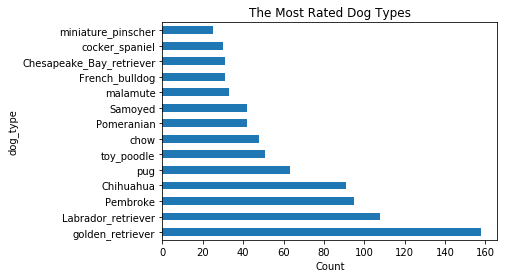

In [255]:
df_dog_type=twitter_archive_master.groupby('dog_type').filter(lambda x: len(x) >=25)
df_dog_type['dog_type'].value_counts().plot(kind='barh')
plt.title('The Most Rated Dog Types')
plt.xlabel('Count')
plt.ylabel('dog_type')

Insight #2: Dog Gender

In [256]:
twitter_archive_master.loc[twitter_archive_master['dog_gender'] == 'NaN', 'dog_gender'] = None

In [257]:
twitter_archive_master['dog_gender']=twitter_archive_master['dog_gender'].astype('category')

Text(0.5,1,'Gender')

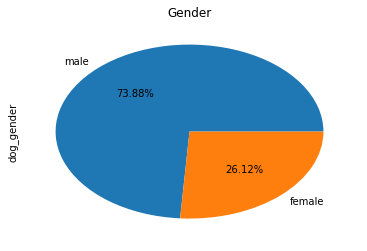

In [258]:
twitter_archive_master[twitter_archive_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.title('Gender')

Insight #3: Dog Stages

(-1.2887645657950173,
 1.2369976874877171,
 -1.2253071441848427,
 1.2098637857406145)

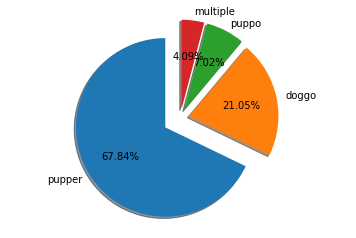

In [259]:
# Plot the data partitioned by dog stages

dog_stage_count = list(twitter_archive_master[twitter_archive_master['dogs_stage'] != 'None']['dogs_stage'].value_counts())[0:4]
dog_stages = twitter_archive_master[twitter_archive_master['dogs_stage'] != 'None']['dogs_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90,autopct='%0.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Insight #4: Which dog breed receives the highest/lowest average rating?

In [260]:
dog_type_mean=twitter_archive_master.groupby('dog_type').mean()

In [261]:
dog_type_mean.sample(3)

,rating_numerator,rating_denominator,favorite_count,retweet_count,rating
dog_type,,,,,
Chihuahua,10.413793,10.011494,6313.022472,2047.876404,10.406479
Walker_hound,9.000000,10.000000,6265.600000,2497.600000,9.000000
West_Highland_white_terrier,14.687500,13.750000,5802.437500,1385.125000,10.187500


In [262]:
dog_type_sorted=dog_type_mean['rating'].sort_values()
dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Maltese_dog                     9.526316
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
English_setter                  9.714286
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Great_Dane                      9.818182
Airedale                        9.833333
papillon                        9.833333
Mexican_hairless                9.857143
Newfoundland                    9.857143
miniatu